In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import pandas as pd

In [9]:
data = pd.read_csv('../train.csv')

In [10]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
from sklearn.model_selection import train_test_split
X = data.loc[:,['GrLivArea', 'YearBuilt']]
y = data.loc[:,'SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state = 0)


In [50]:
print(X_train.shape, X_test.shape)

(1168, 2) (292, 2)


In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scr = StandardScaler()
X_train_standard = scr.fit_transform(np.array(X_train))
X_test_standard = scr.transform(np.array(X_test))
y_train_standard = scr.fit_transform(np.array(y_train).reshape(-1,1))

# 問題1 ブレンディングのスクラッチ実装

In [14]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
svr = SVR()
tree = DecisionTreeRegressor()


In [15]:
lr = lr.fit(X_train, y_train)
svr = svr.fit(X_train, y_train)
tree = tree.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [47]:
def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

In [48]:
simple_lr_pred = lr.predict(X_train)
print('MSE: ', MSE(y_train, simple_lr_pred))

MSE:  1996735698.7802489


In [17]:
y_train_pred_lr = lr.predict(X_train)
y_train_pred_svr = svr.predict(X_train)
y_train_pred_tree = tree.predict(X_train)

y_test_pred_lr = lr.predict(X_test)
y_test_pred_svr = svr.predict(X_test)
y_test_pred_tree = tree.predict(X_test)

#平均によるブレンド
y_train_mean = (y_train_pred_lr + y_train_pred_svr + 
                y_train_pred_tree) / 3

y_test_mean = (y_test_pred_lr + y_test_pred_svr +  
               y_test_pred_tree) / 3


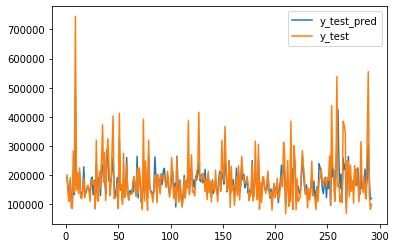

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(1,len(y_test_mean)+1), y_test_mean, 
         label='y_test_pred')
plt.plot(np.arange(1, len(y_test)+1), y_test,label='y_test')
plt.legend()

In [20]:
train_mean_mse = MSE(y_train, y_train_mean)
test_mean_mse = MSE(y_test, y_test_mean)

In [21]:
print('トレーニングデータのMSE: {}'.format(train_mean_mse))
print('テストデータのMSE: {}'.format(test_mean_mse))

トレーニングデータのMSE: 1395983959.2136357
テストデータのMSE: 2836351287.500882


In [22]:
#ロジスティック回帰の平均二乗誤差との比較
train_lr_mse = MSE(y_train, y_train_pred_lr)
test_lr_mse = MSE(y_test, y_test_pred_lr)
print('線形回帰のトレMSE: {}'.format(train_lr_mse))
print('線形回帰のテストMSE: {}'.format(test_lr_mse))

線形回帰のトレMSE: 1996735698.7802489
線形回帰のテストMSE: 2942066921.6721087


In [23]:
print('トレーニングデータは{}倍の誤差'.format(
    train_mean_mse / train_lr_mse))
print('テストデータは{}倍の誤差'.format(
    test_mean_mse / test_lr_mse))

トレーニングデータは0.6991330700735225倍の誤差
テストデータは0.9640675630481091倍の誤差


In [24]:
#ハイパーパラメータのブレンディング
tree_param_1 = DecisionTreeRegressor(max_depth = 5)
tree_param_2 = DecisionTreeRegressor(max_depth = 10)
tree_param_3 = DecisionTreeRegressor(max_depth = 15)


In [25]:
tree_param_1 = tree_param_1.fit(X_train, y_train)
tree_param_2 = tree_param_2.fit(X_train, y_train)
tree_param_3 = tree_param_3.fit(X_train, y_train)

In [26]:
y_train_pred_para1 = tree_param_1.predict(X_train)
print(y_train_pred_para1)
y_train_pred_para2 = tree_param_2.predict(X_train)
y_train_pred_para3 = tree_param_3.predict(X_train)
y_train_mean_para_pred = (y_train_pred_para1 + y_train_pred_para2 + y_train_pred_para3) / 3

[267649.20967742 120437.02884615 106882.31       ... 172781.85806452
 208640.86538462 251867.97590361]


In [27]:
para_mean_mse = MSE(y_train, y_train_mean_para_pred)
print(para_mean_mse)#線形回帰のmseと比較して1桁少ない

333851950.0202931


In [28]:
lr_standard= LinearRegression()
lr_logarithm = LinearRegression()

In [29]:
#入力データの前処理によるブレンディング
X_train_Logarithm = np.log(X_train)
lr_standard = lr_standard.fit(X_train_standard, y_train)
lr_logarithm = lr_logarithm.fit(X_train_Logarithm, y_train)

In [30]:
standard_pred = lr_standard.predict(X_train_standard)
logarithm_pred = lr_logarithm.predict(X_train_Logarithm)

In [31]:
print(MSE(y_train, standard_pred))

1996735698.7802467


In [32]:
print(logarithm_pred)

[251121.29705818 102864.93775686  73077.21536354 ... 228799.5419444
 223835.42508092 243315.24000022]


In [33]:
preprocessing_blend = (standard_pred + logarithm_pred) / 2
print('mse: ', MSE(y_train, preprocessing_blend))

mse:  2100397575.2562335


良い結果でず

In [34]:
print(MSE(y_train, logarithm_pred))

2277396833.5953913


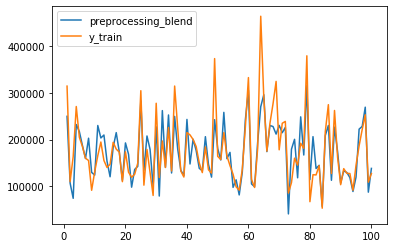

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(1,len(preprocessing_blend[:100])+1), preprocessing_blend[:100], 
         label='preprocessing_blend')
plt.plot(np.arange(1, len(y_train[:100])+1), y_train[:100],label='y_train')
plt.legend()

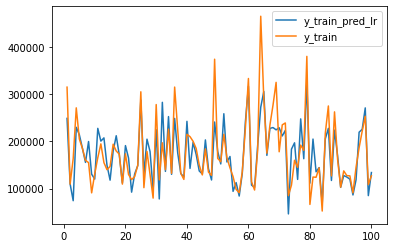

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(1,len(simple_lr_pred[:100])+1), simple_lr_pred[:100], 
         label='y_train_pred_lr')
plt.plot(np.arange(1, len(y_train[:100])+1), y_train[:100],label='y_train')
plt.legend()

In [37]:
#別のモデルのブレンディング
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor

In [62]:
lgb = LGBMRegressor()
lgb = lgb.fit(X_train, y_train)
ada = AdaBoostRegressor()
ada = ada.fit(X_train, y_train)
lgb_pred = lgb.predict(X_train)
ada_pred = ada.predict(X_train)
another_models_pred = (lgb_pred + ada_pred) / 2
print('MSE: ', MSE(another_models_pred, y_train))

MSE:  1147267557.5681357


# 問題2 バギングのスクラッチ実装

In [52]:
class Bagging:
    
    def __init__(self, est_list):

        self.est_list = est_list
#         self.bagi_num = bagi_num
        self.learned_est_list = []
        self.pred_list = []
      
    
    def fit(self, X, y, train_size):
    
        for est in self.est_list:

            #ダイバーのやり方だと非復元抽出になってしまっている
            #復元抽出にするためには、同じindexも取ってくるように
            #しなければいけない
#             X_train_bagi, X_test_bagi, y_train_bagi, y_test_bagi = \
#             train_test_split(X,y, random_state=0,shuffle=True,
#                              train_size = train_size)
            
            X_train_idx = np.random.choice(X.shape[0],
                                           int(np.round(X.shape[0] * train_size)))
            print(X_train_idx.shape,'shpae')
            X_train_bagi = X[X_train_idx,:]
            y_train_bagi = y[X_train_idx]
            
            #testデータは捨てる
            #print('estの正体：',est)
            est = est.fit(X_train_bagi, y_train_bagi)
            self.learned_est_list.append(est)
    
    def predict(self,X):
        for learned_est in self.learned_est_list:
            y_pred = learned_est.predict(X)
            self.pred_list.append(y_pred)
        y_pred_bagging = np.mean(self.pred_list,axis=0)
        return y_pred_bagging

In [61]:
tree_list = []
for i in range(20):
    tree = DecisionTreeRegressor()
    tree_list.append(tree)
bagi = Bagging(tree_list)
bagi.fit(np.array(X_train_standard), np.array(y_train),0.2)
bagi_pred = bagi.predict(X_test_standard)
#print(bagi_pred)

bagi_test_mse = MSE(np.array(y_test), bagi_pred)
print('決定木によるテストデータのバギングのMSE: {}'.format(
bagi_test_mse))

(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
(234,) shpae
決定木によるテストデータのバギングのMSE: 2115184212.5703475


# 問題3 スタッキングのスクラッチ実装

In [287]:
test_stage = Stage(5, model_list1)

test_stage.forward(X_train_standard, y_train_array)

サンプル数 1168
index数 934


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


k_count, d_count
<class 'sklearn.linear_model.logistic.LogisticRegression'>
サンプル数 1168
index数 934
k_count, d_count
<class 'sklearn.linear_model.logistic.LogisticRegression'>
サンプル数 1168
index数 934


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


k_count, d_count
<class 'sklearn.linear_model.logistic.LogisticRegression'>
サンプル数 1168
index数 935


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


k_count, d_count
<class 'sklearn.linear_model.logistic.LogisticRegression'>
サンプル数 1168
index数 935


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


k_count, d_count
<class 'sklearn.linear_model.logistic.LogisticRegression'>
サンプル数 1168
index数 934
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
サンプル数 1168
index数 934
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
サンプル数 1168
index数 934
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
サンプル数 1168
index数 935
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
サンプル数 1168
index数 935
k_count, d_count
<class 'sklearn.svm.classes.SVR'>


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

In [289]:
test_stage.predict(X_test_standard)

test_pred [235000 140000 140000 235000 140000 140000 180000 140000 290000 155000
 155000 140000 290000 140000 140000 140000 190000 155000 140000 135000
 140000 155000 140000 155000 140000 135000 180000 155000 180000 140000
 140000 180000 155000 290000 290000 155000 180000 140000 290000 290000
 140000 140000 155000 180000 290000 140000 140000 155000 140000 140000
 290000 140000 140000 140000 140000 140000 135000 180000 140000 140000
 140000 140000 140000 140000 180000 140000 140000 180000 140000 180000
 180000 140000 140000 180000 140000 180000 140000 140000 290000 140000
 155000 155000 135000 155000 200000 155000 140000 155000 155000 140000
 180000 140000 180000 180000 155000 140000 180000 135000 140000 140000
 180000 290000 140000 140000 100000 290000 155000 140000 180000 140000
 100000 140000 140000 140000 155000 140000 290000 140000 235000 290000
 155000 180000 140000 140000 180000 180000 290000 155000 155000 140000
 155000 155000 235000 140000 140000 180000 140000 155000 140000 140

array([[235000.        , 163115.56686094],
       [140000.        , 162931.47559085],
       [140000.        , 162859.57509469],
       [235000.        , 163199.09066021],
       [140000.        , 162920.93665099],
       [140000.        , 162921.01578826],
       [180000.        , 163209.40063342],
       [140000.        , 162878.49293121],
       [290000.        , 163056.51458368],
       [155000.        , 163093.27611015],
       [155000.        , 163174.99451849],
       [140000.        , 163134.58315097],
       [290000.        , 163271.61815427],
       [140000.        , 162884.52394175],
       [140000.        , 162843.61345484],
       [140000.        , 162904.38208575],
       [190000.        , 163257.24041158],
       [155000.        , 163024.8135904 ],
       [140000.        , 162924.56670039],
       [135000.        , 162980.1161231 ],
       [140000.        , 162905.13881611],
       [155000.        , 163037.92874301],
       [140000.        , 162875.42826411],
       [155

In [278]:
print(X_train_standard.shape)
print(y_train_array[:500])
print(X_train_array[:500])

y_train_array = np.array(y_train)
y_test_array = np.array(y_test)
lr_test = LogisticRegression()
lr_test = lr_test.fit(X_train_standard,y_train_array)
y_pred = lr_test.predict(X_test_standard)
print('y_pred',y_pred)
print('y_test', y_test_array)

(1168, 2)
[314813 109500 163500 271000 205000 185000 160000 155000  91000 131000
 165400 194700 155000 140000 147000 194000 179540 173000 109500 173733
 129900 119000 125500 149300 305000 102000 178740 129500  79900 278000
 118400 197000 140000 226000 132500 315000 224000 132500 119500 215000
 210000 200141 185000 149900 129000 184100 135000 128000 374000 164000
 157000 215000 165000 144000 125500  98300  91300 135960 226700 333168
 114500  97000 181000 465000 290000 175000 235000 277000 325000 178000
 235000 239000  85000 107500 160000 145000 192140 181000 380000  66500
 124500 124000 144000  52500 217000 275000 127000 262500 162000 103000
 137500 127500 127000  91000 145000 186500 221500 253293 108480 127000
 237500  86000 141000 176000 178400 173900 157000 193000 335000 201000
 146500  86000 148000 280000 112000 303477 250000 244600 126000 130500
 241000 118500 115000 129900 202500 118000 335000 125000 255900 342643
 109008 148500 132500 110000 244000 115000 194500 129500 167500 227

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


y_pred [235000 140000 140000 190000 140000 140000 180000 140000 200000 176000
 180000 140000 190000 140000 140000 140000 190000 155000 140000 135000
 140000 176000 110000 180000 140000 135000 180000 110000 180000 140000
 140000 190000 140000 190000 230000 180000 180000 140000 230000 290000
 140000 140000 180000 230000 290000 140000 110000 140000 140000 140000
 290000 140000 140000 110000 140000 140000 135000 230000 140000 110000
 140000 140000 140000 140000 180000 140000 140000 180000 135000 180000
 180000 140000 140000 180000 140000 180000 140000 140000 290000 140000
 140000 140000 135000 155000 200000 180000 140000 180000 176000 140000
 180000 140000 180000 230000 176000 140000 180000 135000 140000 140000
 180000 230000 140000 140000 110000 200000 155000 140000 180000 135000
 110000 140000 140000 140000 180000 140000 290000 140000 235000 230000
 176000 180000 140000 140000 180000 180000 230000 176000 176000 140000
 180000 176000 200000 140000 140000 180000 140000 180000 140000 180000

In [281]:
test_stage.learned_models[0,0].predict(X_test_standard)

array([235000, 140000, 140000, 235000, 140000, 140000, 180000, 140000,
       290000, 155000, 155000, 140000, 290000, 140000, 140000, 140000,
       190000, 155000, 140000, 135000, 140000, 155000, 140000, 155000,
       140000, 135000, 180000, 155000, 180000, 140000, 140000, 180000,
       155000, 290000, 290000, 155000, 180000, 140000, 290000, 290000,
       140000, 140000, 155000, 180000, 290000, 140000, 140000, 155000,
       140000, 140000, 290000, 140000, 140000, 140000, 140000, 140000,
       135000, 180000, 140000, 140000, 140000, 140000, 140000, 140000,
       180000, 140000, 140000, 180000, 140000, 180000, 180000, 140000,
       140000, 180000, 140000, 180000, 140000, 140000, 290000, 140000,
       155000, 155000, 135000, 155000, 200000, 155000, 140000, 155000,
       155000, 140000, 180000, 140000, 180000, 180000, 155000, 140000,
       180000, 135000, 140000, 140000, 180000, 290000, 140000, 140000,
       100000, 290000, 155000, 140000, 180000, 140000, 100000, 140000,
      

In [442]:
from sklearn.linear_model import LinearRegression
lr_sta = LinearRegression()
svr_sta = SVR()


k_num = 5
model_list1 = [lr_sta, tree_sta]
model_list2 = [tree_sta, lr_sta]
model_list_last = [lr_sta]
stage1 = Stage(k_num, model_list1)
stage2 = Stage(k_num, model_list2)
stage_last = Stage(k_num, model_list_last)
X_array = np.array(X)
y_array = np.array(y)
y_preds = stage.forward(X_array,y_array)
y_preds = stage2.forward(y_preds, y_array)
y_preds = stage_last.forward(y_preds, y_array)
print(y_preds)




//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


k_count, d_count
0 0
<class 'sklearn.linear_model.logistic.LogisticRegression'>
y_preds_by_dim 1460
sample_num 314
start_sample_idx 0
last_sample_idx 314


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


k_count, d_count
1 0
<class 'sklearn.linear_model.logistic.LogisticRegression'>
y_preds_by_dim 1460
sample_num 280
start_sample_idx 314
last_sample_idx 594


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


k_count, d_count
2 0
<class 'sklearn.linear_model.logistic.LogisticRegression'>
y_preds_by_dim 1460
sample_num 306
start_sample_idx 594
last_sample_idx 900


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


k_count, d_count
3 0
<class 'sklearn.linear_model.logistic.LogisticRegression'>
y_preds_by_dim 1460
sample_num 295
start_sample_idx 900
last_sample_idx 1195


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


k_count, d_count
4 0
<class 'sklearn.linear_model.logistic.LogisticRegression'>
y_preds_by_dim 1460
sample_num 265
start_sample_idx 1195
last_sample_idx 1460


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


k_count, d_count
0 1
<class 'sklearn.svm.classes.SVR'>
y_preds_by_dim 1460
sample_num 329
start_sample_idx 0
last_sample_idx 329
k_count, d_count
1 1
<class 'sklearn.svm.classes.SVR'>
y_preds_by_dim 1460
sample_num 306
start_sample_idx 329
last_sample_idx 635
k_count, d_count
2 1
<class 'sklearn.svm.classes.SVR'>
y_preds_by_dim 1460
sample_num 295
start_sample_idx 635
last_sample_idx 930
k_count, d_count
3 1
<class 'sklearn.svm.classes.SVR'>
y_preds_by_dim 1460
sample_num 266
start_sample_idx 930
last_sample_idx 1196


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
4 1
<class 'sklearn.svm.classes.SVR'>
y_preds_by_dim 1460
sample_num 264
start_sample_idx 1196
last_sample_idx 1460
<class 'numpy.ndarray'> Xのタイプ
サンプル数 1460
index数 1168
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 292
サンプル数 1460
index数 1168
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 584
サンプル数 1460
index数 1168
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 876
サンプル数 1460
index数 1168
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1168
サンプル数 1460
index数 1168
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1460
最後の値が格納されているかチェック [193804. 193804. 193804. ... 386250. 386250. 386250.]
サンプル数 1460
index数 1168
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 292
サンプル数 1460
index数 1168
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sa

最初に指定されたインデックス-最後のインデックスの一歩手前

In [635]:
from sklearn.model_selection import KFold

class Stage:
    
    def __init__(self, k_num, model_list):
        self.k_num = k_num
        self.model_list = model_list
        self.learned_models = np.empty((len(self.model_list),
                                        self.k_num)).astype(dtype=object)
        self.mse_array = None
#         self.dim_list = dim_list        
    def forward(self,X,y):
            
            
            print(str(X.shape[1]) + '個の特徴量で学習を開始します。')
            y_preds = np.zeros((X.shape[0], len(self.model_list)))
#             d_count = 0
            
        
            for idx, model in enumerate(self.model_list):
                
                y_preds_by_dim = np.zeros(X.shape[0])
                start_sample_idx = 0
                
#                 x_dim = X[:,dim]
                
#                 if x_dim.ndim == 1:
#                     x_dim = x_dim.reshape(-1,1)
                
                #kfold_crossvalidation_start
                k_count = 0
                kf  = KFold(n_splits = self.k_num)
                
                for train_idx, test_idx in kf.split(X, y):
                    
                    #学習
                    print('サンプル数', X.shape[0])
                    print('index数', len(train_idx))
                    #print('k_sample', train_idx)
                    model = model.fit(X[train_idx,:], y[train_idx])
                    
                    print('k_count, d_count')
                    #print(k_count, dim)
                    print(type(model))
                    #学習済みモデルの格納
                    self.learned_models[idx, k_count] = model
                    k_count += 1
                    
                     #予測
                    y_pred = model.predict(X[test_idx])
                    
                    #予測値の格納
                    sample_num = len(test_idx)
#                     print('y_preds_by_dim', len(y_preds_by_dim))
#                     print('sample_num', sample_num)
#                     print('start_sample_idx', start_sample_idx)
                    last_sample_idx = sample_num + start_sample_idx
                    print('last_sample_idx', last_sample_idx)
                    y_preds_by_dim[start_sample_idx : last_sample_idx] =\
                    y_pred
                    start_sample_idx = last_sample_idx 
                    
                    
                print('最後の値が格納されているかチェック', y_preds_by_dim)
                y_preds[:,idx] = y_preds_by_dim
            
            return y_preds
        
    def predict(self, X):
        print('使用するモデルの形を表示：',self.learned_models.shape)
        len_models = len(self.model_list)
        print('モデルの長さ：', len_models)
        test_preds_mean_array = np.zeros((X.shape[0], len_models))
        
        for i in range(len_models):
            test_preds = np.zeros((X.shape[0], self.k_num))
            for j in range(self.k_num):
                print(str(X.shape[1]) + '個の特徴量で予測を行います。')
                test_pred = self.learned_models[i, j].predict(X)
                print('test_pred', test_pred[:3])
                test_preds[:, j] = test_pred
            print('test_preds in stage:', test_preds[:3,:])
            test_preds_mean = np.mean(test_preds, axis=1)
            print('test_preds_mean: ', test_preds_mean)
            test_preds_mean_array[:,i] = test_preds_mean
        print('test_preds_mean_array', test_preds_mean_array[:3,:])
        return test_preds_mean_array
    
    def mse(self, X, y):
        mse_scores = np.zeros_like(self.learned_models)
        for i in range(self.learned_models.shape[0]):
            for j in range(self.learned_models.shape[1]):
                model = self.learned_models[i,j]
                y_pred = model.predict(X)
                mse_score = MSE(y,y_pred)
                mse_scores[i,j] = mse_score
        return mse_scores
        
        
                
                    
        

In [636]:
class Stacking:
    def __init__(self, model_lists, k_num):
        self.model_lists = model_lists
        self.k_num = k_num
        self.test_preds_mean_list = []
        self.learned_model_lists = []
        self.stages = []
        self.mse_scores_list = []
        for  model_list in model_lists:
            stage = Stage(self.k_num, model_list)
            self.stages.append(stage)
            
    
    def fit(self, X,y):
        y_preds = X
        count = 1
        for stage in self.stages:
            print(type(y_preds),'y_predsのタイプ')
            print()
            print('==========' + str(count) + '回目の学習開始=======')
            print()
            y_preds =stage.forward(y_preds,y) 
            print()
            print('==========' + str(count) + '回目の学習終了=======')
            print()
            print(y_preds.shape,'y_preds_shape yの形')
            self.learned_model_lists.append(stage.learned_models)
            count += 1
    
    def _predict(self, X):
        test_pred = X
        count = 1
        for stage in self.stages[:-1]:
            
            print(test_pred.shape,'test_pred_shape')
            print()
            print('==========' + str(count) + '回目の予測開始=======')
            print()
            test_pred =stage.predict(test_pred)
            print()
            print('==========' + str(count) + '回目の予測終了=======')
            print()
            print(test_pred.shape,'test_pred.shape テストの形')
            count += 1
        return test_pred
    
    def predict(self,X):
        test_pred = self._predict(X)
        last_model = self.learned_model_lists[-1][0][0]
        print()
        print('==========最後の予測開始=======')
        print()
        test_pred = last_model.predict(test_pred)
        print()
        print('==========最後の予測終了=======')
        print()
        print(test_pred.shape,'test_pred.shape テストの形')
        return test_pred
    
    def mse(self, X,y):
        for stage in self.stages:
            mse_scores =  stage.mse(X,y)
            self.mse_scores_list.append(mse_scores)
            return self.mse_scores_list
        
            
            
#         for model in self.learned_model_lists[:-1]:
#             test_preds = np.zeros((X.shape[0], k_num))
#             for idx, k_sep_model in enumerate(model):
#                 test_pred = k_sep_model.predict(X)
#                 test_preds[:,idx] = test_pred
#             test_preds_mean = np.mean(test_preds,axis=1)
#             self.test_preds_mean_list.append(test_preds_mean)
        
            
                
            
        
        
        
        
        
            

In [703]:
def TreeSearch(tree_params, X_train_standard, X_test_standard,
              y_train_array, y_test_array):
    
    best_mse = 10**12
    best_params = np.zeros(3)
    best_model = None
    
    for i in tree_params[0]:
        for j in tree_params[1]:
            for k in tree_params[2]:
                rfr_sta1 = RandomForestRegressor()
                rfr_sta2 = RandomForestRegressor()
                lr_sta1 = LinearRegression()
                lr_sta2 = LinearRegression()
                lr_sta3 = LinearRegression()
                svr_sta1 = SVR()
                svr_sta2 = SVR()
                tree_sta_1 = DecisionTreeRegressor(max_depth=i)
                tree_sta_2 = DecisionTreeRegressor(max_depth=j)
                tree_sta_3 = DecisionTreeRegressor(max_depth=k)
                model_list1 = [tree_sta_2, tree_sta_1,svr_sta1]
                model_list2 = [rfr_sta2, lr_sta1,svr_sta2]
                model_list3 = [lr_sta2,tree_sta_3]
                model_list_last = [lr_sta3]



                model_lists = [model_list1, model_list2, model_list3,model_list_last]
                stacking = Stacking(model_lists, 10)
                stacking.fit(X_train_standard, y_train_array)
                y_pred = stacking.predict(X_test_standard)
                mse = MSE(y_pred, y_test_array)
                if mse < best_mse:
                    best_mse = mse
                    best_params = np.array([i, j, k])
                    best_model = stacking
                    
    
    return best_mse, best_params,best_model
                    
                
                
                
                
                
    
    

In [704]:
tree_params1 = [4,5,6]
tree_params2 = [29,30,31]
tree_params3 = [12,13,14]
tree_params = [tree_params1,tree_params2,tree_params3]

best_mse, best_params,best_model = TreeSearch(tree_params, X_train_standard, X_test_standard,
              y_train_array, y_test_array)

<class 'numpy.ndarray'> y_predsのタイプ

==========1回目の学習開始=======

2個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegres

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65000002 162999.65000002 162999.65000002 ... 162950.
 162950.         162950.        ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 702


test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
test_preds in stage: [[162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]
 [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]
 [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]]
test_preds_mean:  [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegres

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65 162999.65 162999.65 ... 162950.   162950.   162950.  ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegre

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
test_preds in stage: [[151400. 151400. 151400. 151400. 151400. 151400. 151400. 151400. 151400.
  151400.]
 [117000. 117000. 117000. 117000. 117000. 117000. 117000. 117000. 117000.
  117000.]
 [135000. 135000. 135000. 135000. 135000. 135000. 135000. 135000. 135000.
  135000.]]
test_preds_mean:  [151400.         117000.         135000.         144000.
  81500.          94000.         179540.         105000.
 625000.         155000.         202500.         162900.
 255000.      

test_pred [190000. 121150. 113880.]
3個の特徴量で予測を行います。
test_pred [190000. 121150. 113880.]
test_preds in stage: [[190000. 190000. 190000. 190000. 190000. 190000. 190000. 190000. 190000.
  190000.]
 [121150. 121150. 121150. 121150. 121150. 121150. 121150. 121150. 121150.
  121150.]
 [113880. 113880. 113880. 113880. 113880. 113880. 113880. 113880. 113880.
  113880.]]
test_preds_mean:  [190000.  121150.  113880.  172000.  117900.  108210.  148930.  116850.
 394500.  156850.  142100.  189223.3 240914.  120900.  132450.  166407.
 255750.  138780.  134650.  166050.  190573.3 162290.  116500.  261300.
 166390.  124300.  299730.  119150.  314177.1 111850.  213740.  248830.
 137236.  237420.  310878.  144530.  248400.  139290.  307167.  305096.2
 189140.  170907.  150800.  228730.  272490.  147378.5 121700.  119750.
 173360.   95840.  264117.  151840.  153407.  102610.  211940.  121100.
 156085.  257109.2 141310.  102610.  136285.  112190.  150907.  120500.
 211940.  148128.5 132220.  282086.2 121

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensem

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 1168
最後の値が格納されているかチェック [297593.6 140352.5  97290.  ... 182469.5 231700.  231479. ]
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65 162999.65 162999.65 ... 162950.   162950.   162950.  ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegre

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 1168
最後の値が格納されているかチェック [280056.87451276 140672.06243601 109785.79305519 ... 204301.5638283
 216903.56543249 218844.52145219]

==========4回目の学習終了=======

(1168, 1) y_preds_shape yの形
(292, 2) test_pred_shape

==========1回目の予測開始=======

使用するモデルの形を表示： (3, 10)
モデルの長さ： 3
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 1170

 302545.4 165550.   96150.  104580. ]
3個の特徴量で予測を行います。
test_pred [185152.06646454 131794.71383783 120767.0034048 ]
3個の特徴量で予測を行います。
test_pred [185152.06646454 131794.71383783 120767.0034048 ]
3個の特徴量で予測を行います。
test_pred [185152.06646454 131794.71383783 120767.0034048 ]
3個の特徴量で予測を行います。
test_pred [185152.06646454 131794.71383783 120767.0034048 ]
3個の特徴量で予測を行います。
test_pred [185152.06646454 131794.71383783 120767.0034048 ]
3個の特徴量で予測を行います。
test_pred [185152.06646454 131794.71383783 120767.0034048 ]
3個の特徴量で予測を行います。
test_pred [185152.06646454 131794.71383783 120767.0034048 ]
3個の特徴量で予測を行います。
test_pred [185152.06646454 131794.71383783 120767.0034048 ]
3個の特徴量で予測を行います。
test_pred [185152.06646454 131794.71383783 120767.0034048 ]
3個の特徴量で予測を行います。
test_pred [185152.06646454 131794.71383783 120767.0034048 ]
test_preds in stage: [[185152.06646454 185152.06646454 185152.06646454 185152.06646454
  185152.06646454 185152.06646454 185152.06646454 185152.06646454
  185152.06646454 185152.06646454]
 [131794.71383

サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65000002 162999.65000002 162999.65000002 ... 162950.
 162950.         162950.        ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1168
最後の値が格納されているかチェック [475000.          91500.         108870.28571429 ... 284000.
 203490.625      240250.        ]

==========3回目の学習終了=======

(1168, 2) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========4回目の学習開始=======

2個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.li

test_pred [192371.0352895  128663.72930124 120238.23827613]
3個の特徴量で予測を行います。
test_pred [192371.0352895  128663.72930124 120238.23827613]
test_preds in stage: [[192371.0352895  192371.0352895  192371.0352895  192371.0352895
  192371.0352895  192371.0352895  192371.0352895  192371.0352895
  192371.0352895  192371.0352895 ]
 [128663.72930124 128663.72930124 128663.72930124 128663.72930124
  128663.72930124 128663.72930124 128663.72930124 128663.72930124
  128663.72930124 128663.72930124]
 [120238.23827613 120238.23827613 120238.23827613 120238.23827613
  120238.23827613 120238.23827613 120238.23827613 120238.23827613
  120238.23827613 120238.23827613]]
test_preds_mean:  [192371.0352895  128663.72930124 120238.23827613 177015.65086685
 119831.95239377 104139.8484143  181728.55657109 119063.70912831
 464262.56360111 151046.54884958 179980.3904981  166171.76767092
 255337.30568297 130163.40174933 125122.43767778 161908.79192254
 215176.48150652 138812.08402544 124060.80027955 166491.50942413


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegres

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65000002 162999.65000002 162999.65000002 ... 162950.
 162950.         162950.        ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, 

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 1168
最後の値が格納されているかチェック [274740.78062011 136398.55099814 104605.06934536 ... 194117.57685217
 224679.05027652 207621.36717828]

==========4回目の学習終了=======

(1168, 1) y_preds_shape yの形
(292, 2) test_pred_shape

==========1回目の予測開始=======

使用するモデルの形を表示： (3, 10)
モデルの長さ： 3
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pre

k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1168
最後の値が格納されているかチェック [319000. 144000. 108500. ... 190000. 201000. 211000.]
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.Dec

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65 162999.65 162999.65 ... 162950.   162950.   162950.  ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 468
サンプル数 1168
index数 1051


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


test_pred [163001.11145405 162800.78039266 162714.08972652]
2個の特徴量で予測を行います。
test_pred [163001.11145405 162800.78039266 162714.08972652]
2個の特徴量で予測を行います。
test_pred [163001.11145405 162800.78039266 162714.08972652]
2個の特徴量で予測を行います。
test_pred [163001.11145405 162800.78039266 162714.08972652]
2個の特徴量で予測を行います。
test_pred [163001.11145405 162800.78039266 162714.08972652]
2個の特徴量で予測を行います。
test_pred [163001.11145405 162800.78039266 162714.08972652]
test_preds in stage: [[163001.11145405 163001.11145405 163001.11145405 163001.11145405
  163001.11145405 163001.11145405 163001.11145405 163001.11145405
  163001.11145405 163001.11145405]
 [162800.78039266 162800.78039266 162800.78039266 162800.78039266
  162800.78039266 162800.78039266 162800.78039266 162800.78039266
  162800.78039266 162800.78039266]
 [162714.08972652 162714.08972652 162714.08972652 162714.08972652
  162714.08972652 162714.08972652 162714.08972652 162714.08972652
  162714.08972652 162714.08972652]]
test_preds_mean:  [163001.11145405 16

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65000002 162999.65000002 162999.65000002 ... 162950.
 162950.         162950.        ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 702


test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
test_preds in stage: [[162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]
 [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]
 [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]]
test_preds_mean:  [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegres

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65000002 162999.65000002 162999.65000002 ... 162950.
 162950.         162950.        ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 702


test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
test_preds in stage: [[162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]
 [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]
 [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]]
test_preds_mean:  [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 1629

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa


last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65 162999.65 162999.65 ... 162950.   162950.   162950.  ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.Linea

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1168
最後の値が格納されているかチェック [248328. 119500. 115000. ... 375000. 239000. 194500.]

==========3回目の学習終了=======

(1168, 2) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========4回目の学習開始=======

2個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168


test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
test_preds in stage: [[162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]
 [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]
 [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]]
test_preds_mean:  [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 1168
最後の値が格納されているかチェック [245564.  105150.  101490.  ... 165230.  205744.1 246400. ]
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65 162999.65 162999.65 ... 162950.   162950.   162950.  ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_coun

test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
test_preds in stage: [[162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]
 [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]
 [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]]
test_preds_mean:  [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 1629

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65000002 162999.65000002 162999.65000002 ... 162950.
 162950.         162950.        ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'skl

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1168
最後の値が格納されているかチェック [246578. 152000.  80000. ... 139000. 189000. 186500.]

==========3回目の学習終了=======

(1168, 2) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========4回目の学習開始=======

2個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_co

test_pred [168500. 143550.  83450.]
3個の特徴量で予測を行います。
test_pred [168500. 143550.  83450.]
3個の特徴量で予測を行います。
test_pred [168500. 143550.  83450.]
3個の特徴量で予測を行います。
test_pred [168500. 143550.  83450.]
3個の特徴量で予測を行います。
test_pred [168500. 143550.  83450.]
3個の特徴量で予測を行います。
test_pred [168500. 143550.  83450.]
3個の特徴量で予測を行います。
test_pred [168500. 143550.  83450.]
test_preds in stage: [[168500. 168500. 168500. 168500. 168500. 168500. 168500. 168500. 168500.
  168500.]
 [143550. 143550. 143550. 143550. 143550. 143550. 143550. 143550. 143550.
  143550.]
 [ 83450.  83450.  83450.  83450.  83450.  83450.  83450.  83450.  83450.
   83450.]]
test_preds_mean:  [168500.         143550.          83450.         191850.
 140000.         115166.66666667 284000.         147000.
 383970.         140500.         191850.         118000.
 250750.         133240.          79900.         158850.
 250750.         130695.83333333 140000.         168500.
 168500.         152390.90909091 123083.33333333 196500.
 328900.       

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegres

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65 162999.65 162999.65 ... 162950.   162950.   162950.  ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


test_pred [225652.05882353 143313.52631579 108273.53488372]
2個の特徴量で予測を行います。
test_pred [225652.05882353 143313.52631579 108273.53488372]
2個の特徴量で予測を行います。
test_pred [225652.05882353 143313.52631579 108273.53488372]
2個の特徴量で予測を行います。
test_pred [225652.05882353 143313.52631579 108273.53488372]
2個の特徴量で予測を行います。
test_pred [225652.05882353 143313.52631579 108273.53488372]
test_preds in stage: [[225652.05882353 225652.05882353 225652.05882353 225652.05882353
  225652.05882353 225652.05882353 225652.05882353 225652.05882353
  225652.05882353 225652.05882353]
 [143313.52631579 143313.52631579 143313.52631579 143313.52631579
  143313.52631579 143313.52631579 143313.52631579 143313.52631579
  143313.52631579 143313.52631579]
 [108273.53488372 108273.53488372 108273.53488372 108273.53488372
  108273.53488372 108273.53488372 108273.53488372 108273.53488372
  108273.53488372 108273.53488372]]
test_preds_mean:  [225652.05882353 143313.52631579 108273.53488372 190285.36585366
 138570.12631579 108273.534883

k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1168
最後の値が格納されているかチェック [262371.72222222 120547.77659574 100849.45652174 ... 190285.36585366
 210601.54639175 240957.70731707]
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_co

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 1168
最後の値が格納されているかチェック [262146.6 107550.   95740.  ... 154793.3 202440.  234869. ]
サンプル数 1168
inde

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65 162999.65 162999.65 ... 162950.   162950.   162950.  ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 

test_preds_mean:  [222650.  161190.  110090.  192111.8 115349.3 113380.  176300.  107930.
 292001.1 151280.  177565.  141950.  209254.  106250.  115800.  157055.2
 243030.  132490.  129649.3 140200.  145125.  143840.  113400.  193250.
 160183.3 150773.7 244150.  111290.  358331.3  82960.  148600.  216498.
 120650.  238730.  344434.2 172462.3 215280.  120300.  225674.  324905.4
 184804.1 147705.2 156499.  243030.  416480.2 167320.  112690.  106550.
 159350.  120648.  296473.8 138090.  166400.   91200.  191830.  105000.
 123215.  269363.6 133920.   91200.  147955.  125834.3 160940.  110396.6
 207080.  168200.  104590.  277280.  109015.  203780.  178920.3 121690.
 113048.  169000.  112950.  330750.  147955.   77990.  312985.8 154150.
 112950.  108696.  119950.  132490.  361523.1 161872.3 111370.  177565.
 189850.  133920.  222550.  189750.  183240.  235210.  187828.3 157475.
 196630.  138730.  105000.  142650.  199580.  265830.  157055.2 171700.
  78340.  331522.2 180780.3  85950.  196630

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 468
サンプル数 1168
index数

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65 162999.65 162999.65 ... 162950.   162950.   162950.  ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class '

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 1168
最後の値が格納されているかチェック [257270.34941802 123521.10186543 109212.18909404 ... 183412.90949341
 211269.03316726 230332.59724916]
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 585
サンプル数 1168


test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
test_preds in stage: [[162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]
 [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]
 [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]]
test_preds_mean:  [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 1

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.for

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65000002 162999.65000002 162999.65000002 ... 162950.
 162950.         162950.        ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 1168
最後の値が格納されているかチェック [253614.40073097 122016.87808322 107361.9000788  ... 182894.33237337
 205638.17498757 234750.16898178]
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 468
サンプル数 11

test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
test_preds in stage: [[162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]
 [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]
 [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]]
test_preds_mean:  [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegr

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65 162999.65 162999.65 ... 162950.   162950.   162950.  ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.Linear

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1168
最後の値が格納されているかチェック [248328.         129371.42857143  95000.         ... 194246.875
 186727.1875     228500.        ]

==========3回目の学習終了=======

(1168, 2) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========4回目の学習開始=======

2個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.lin

test_pred [221693.0893615  150576.95768192 118148.01697305]
3個の特徴量で予測を行います。
test_pred [221693.0893615  150576.95768192 118148.01697305]
3個の特徴量で予測を行います。
test_pred [221693.0893615  150576.95768192 118148.01697305]
3個の特徴量で予測を行います。
test_pred [221693.0893615  150576.95768192 118148.01697305]
3個の特徴量で予測を行います。
test_pred [221693.0893615  150576.95768192 118148.01697305]
3個の特徴量で予測を行います。
test_pred [221693.0893615  150576.95768192 118148.01697305]
3個の特徴量で予測を行います。
test_pred [221693.0893615  150576.95768192 118148.01697305]
3個の特徴量で予測を行います。
test_pred [221693.0893615  150576.95768192 118148.01697305]
3個の特徴量で予測を行います。
test_pred [221693.0893615  150576.95768192 118148.01697305]
3個の特徴量で予測を行います。
test_pred [221693.0893615  150576.95768192 118148.01697305]
test_preds in stage: [[221693.0893615  221693.0893615  221693.0893615  221693.0893615
  221693.0893615  221693.0893615  221693.0893615  221693.0893615
  221693.0893615  221693.0893615 ]
 [150576.95768192 150576.95768192 150576.95768192 150576.95768192
  15

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegres

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65000002 162999.65000002 162999.65000002 ... 162950.
 162950.         162950.        ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, 

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 1168
最後の値が格納されているかチェック [243651.2860577  129540.42583809 111923.10333027 ... 195502.0633864
 205003.95464187 222796.14795899]

==========4回目の学習終了=======

(1168, 1) y_preds_shape yの形
(292, 2) test_pred_shape

==========1回目の予測開始=======

使用するモデルの形を表示： (3, 10)
モデルの長さ： 3
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 13500

k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1168
最後の値が格納されているかチェック [319000. 144000. 108500. ... 190000. 201000. 189000.]
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.Dec

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.ensemble.forest.

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa


<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65000002 162999.65000002 162999.65000002 ... 162950.
 162950.         162950.        ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


test_preds_mean:  [151400.         117000.         135000.         144000.
  81500.          96500.         179540.         105000.
 625000.         157000.         202500.         162900.
 255000.         122000.         142125.         153000.
 236000.         126000.         101800.         129500.
 165000.         144433.33333333  62383.         270000.
 197500.         124000.         227000.          89000.
 318000.         130500.         161500.         239000.
 143000.         228500.         253293.         177000.
 174000.         144000.         274300.         290000.
 262500.         157000.         169990.         237000.
 285000.         142600.         107500.         123000.
 197000.          80000.         260000.         159950.
 147000.          96500.         188000.         120500.
 189950.         374000.         160000.          96500.
 132250.         128900.         149700.         124000.
 188000.         144000.         109008.         252678.
 116000.     

k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1168
最後の値が格納されているかチェック [285841.81818182 122285.125       95048.52941176 ... 187817.5
 213765.18987342 221937.03703704]
サンプル数 1168
index数 1051
k_co

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegres

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65000002 162999.65000002 162999.65000002 ... 162950.
 162950.         162950.        ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
l

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 1168
最後の値が格納されているかチェック [317707.53706008 131025.38350157 106315.84034774 ... 185451.4686768
 198694.90423926 221973.09372264]

==========4回目の学習終了=======

(1168, 1) y_preds_shape yの形
(292, 2) test_pred_shape

==========1回目の予測開始=======

使用するモデルの形を表示： (3, 10)
モデルの長さ： 3
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400.

k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1168
最後の値が格納されているかチェック [319000. 144000. 108500. ... 190000. 201000. 211000.]
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.Dec

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65 162999.65 162999.65 ... 162950.   162950.   162950.  ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


2個の特徴量で予測を行います。
test_pred [221126.36363636 145608.72222222 110651.8974359 ]
2個の特徴量で予測を行います。
test_pred [221126.36363636 145608.72222222 110651.8974359 ]
2個の特徴量で予測を行います。
test_pred [221126.36363636 145608.72222222 110651.8974359 ]
2個の特徴量で予測を行います。
test_pred [221126.36363636 145608.72222222 110651.8974359 ]
2個の特徴量で予測を行います。
test_pred [221126.36363636 145608.72222222 110651.8974359 ]
2個の特徴量で予測を行います。
test_pred [221126.36363636 145608.72222222 110651.8974359 ]
2個の特徴量で予測を行います。
test_pred [221126.36363636 145608.72222222 110651.8974359 ]
2個の特徴量で予測を行います。
test_pred [221126.36363636 145608.72222222 110651.8974359 ]
2個の特徴量で予測を行います。
test_pred [221126.36363636 145608.72222222 110651.8974359 ]
2個の特徴量で予測を行います。
test_pred [221126.36363636 145608.72222222 110651.8974359 ]
test_preds in stage: [[221126.36363636 221126.36363636 221126.36363636 221126.36363636
  221126.36363636 221126.36363636 221126.36363636 221126.36363636
  221126.36363636 221126.36363636]
 [145608.72222222 145608.72222222 145608.72222222 14

k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1168
最後の値が格納されているかチェック [319000. 144000. 108500. ... 190000. 201000. 211000.]
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.Dec

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65000002 162999.65000002 162999.65000002 ... 162950.
 162950.         162950.        ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
l

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 1168
最後の値が格納されているかチェック [268779.61236755 115904.20456428 101892.31959154 ... 176575.70040262
 230520.3322

サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1052
サンプル数 116

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65 162999.65 162999.65 ... 162950.   162950.   162950.  ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.Linear

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1168
最後の値が格納されているかチェック [254900.         141166.66666667 112833.33333333 ... 124500.
 307000.         229000.        ]

==========3回目の学習終了=======

(1168, 2) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========4回目の学習開始=======

2個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegre

test_pred [218677.93367072 145511.50102778 122520.25173354]
3個の特徴量で予測を行います。
test_pred [218677.93367072 145511.50102778 122520.25173354]
3個の特徴量で予測を行います。
test_pred [218677.93367072 145511.50102778 122520.25173354]
3個の特徴量で予測を行います。
test_pred [218677.93367072 145511.50102778 122520.25173354]
3個の特徴量で予測を行います。
test_pred [218677.93367072 145511.50102778 122520.25173354]
3個の特徴量で予測を行います。
test_pred [218677.93367072 145511.50102778 122520.25173354]
3個の特徴量で予測を行います。
test_pred [218677.93367072 145511.50102778 122520.25173354]
3個の特徴量で予測を行います。
test_pred [218677.93367072 145511.50102778 122520.25173354]
3個の特徴量で予測を行います。
test_pred [218677.93367072 145511.50102778 122520.25173354]
test_preds in stage: [[218677.93367072 218677.93367072 218677.93367072 218677.93367072
  218677.93367072 218677.93367072 218677.93367072 218677.93367072
  218677.93367072 218677.93367072]
 [145511.50102778 145511.50102778 145511.50102778 145511.50102778
  145511.50102778 145511.50102778 145511.50102778 145511.50102778
  145511.501

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65 162999.65 162999.65 ... 162950.   162950.   162950.  ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 1168
最後の値が格納されているかチェック [265507.55497112 122485.65743831 114650.74822802 ... 171056.67017399
 194936.5351023  201347.63002001]

==========4回目の学習終了=======

(1168, 1) y_preds_shape yの形
(292, 2) test_pred_shape

==========1回目の予測開始=======

使用するモデルの形を表示： (3, 10)
モデルの長さ： 3
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 1350

test_pred [228161.18821215 148560.03291557 112725.1158571 ]
3個の特徴量で予測を行います。
test_pred [228161.18821215 148560.03291557 112725.1158571 ]
3個の特徴量で予測を行います。
test_pred [228161.18821215 148560.03291557 112725.1158571 ]
3個の特徴量で予測を行います。
test_pred [228161.18821215 148560.03291557 112725.1158571 ]
3個の特徴量で予測を行います。
test_pred [228161.18821215 148560.03291557 112725.1158571 ]
3個の特徴量で予測を行います。
test_pred [228161.18821215 148560.03291557 112725.1158571 ]
3個の特徴量で予測を行います。
test_pred [228161.18821215 148560.03291557 112725.1158571 ]
3個の特徴量で予測を行います。
test_pred [228161.18821215 148560.03291557 112725.1158571 ]
test_preds in stage: [[228161.18821215 228161.18821215 228161.18821215 228161.18821215
  228161.18821215 228161.18821215 228161.18821215 228161.18821215
  228161.18821215 228161.18821215]
 [148560.03291557 148560.03291557 148560.03291557 148560.03291557
  148560.03291557 148560.03291557 148560.03291557 148560.03291557
  148560.03291557 148560.03291557]
 [112725.1158571  112725.1158571  112725.1158571  112

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65000002 162999.65000002 162999.65000002 ... 162950.
 162950.         162950.        ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.L

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1168
最後の値が格納されているかチェック [377500.         121750.         104085.         ... 187116.66666667
 224900.         374000.        ]

==========3回目の学習終了=======

(1168, 2) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========4回目の学習開始=======

2個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class '

test_pred [200283.11870456 143494.55142365 125848.25611204]
3個の特徴量で予測を行います。
test_pred [200283.11870456 143494.55142365 125848.25611204]
3個の特徴量で予測を行います。
test_pred [200283.11870456 143494.55142365 125848.25611204]
3個の特徴量で予測を行います。
test_pred [200283.11870456 143494.55142365 125848.25611204]
3個の特徴量で予測を行います。
test_pred [200283.11870456 143494.55142365 125848.25611204]
3個の特徴量で予測を行います。
test_pred [200283.11870456 143494.55142365 125848.25611204]
test_preds in stage: [[200283.11870456 200283.11870456 200283.11870456 200283.11870456
  200283.11870456 200283.11870456 200283.11870456 200283.11870456
  200283.11870456 200283.11870456]
 [143494.55142365 143494.55142365 143494.55142365 143494.55142365
  143494.55142365 143494.55142365 143494.55142365 143494.55142365
  143494.55142365 143494.55142365]
 [125848.25611204 125848.25611204 125848.25611204 125848.25611204
  125848.25611204 125848.25611204 125848.25611204 125848.25611204
  125848.25611204 125848.25611204]]
test_preds_mean:  [200283.11870456 14

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 1168
最後の値が格納されているかチェック [271727.4 115425.  107150.  ... 174970.  206028.4 222424. ]
サンプル数 1168
inde

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65 162999.65 162999.65 ... 162950.   162950.   162950.  ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 1168
最後の値が格納されているかチェック [276409.33540973 126261.7138798  108024.83700177 ... 182747.87391145
 206470.71785683 214375.80467312]
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sam

test_pred [163001.11145405 162800.78039266 162714.08972652]
2個の特徴量で予測を行います。
test_pred [163001.11145405 162800.78039266 162714.08972652]
2個の特徴量で予測を行います。
test_pred [163001.11145405 162800.78039266 162714.08972652]
2個の特徴量で予測を行います。
test_pred [163001.11145405 162800.78039266 162714.08972652]
2個の特徴量で予測を行います。
test_pred [163001.11145405 162800.78039266 162714.08972652]
2個の特徴量で予測を行います。
test_pred [163001.11145405 162800.78039266 162714.08972652]
2個の特徴量で予測を行います。
test_pred [163001.11145405 162800.78039266 162714.08972652]
test_preds in stage: [[163001.11145405 163001.11145405 163001.11145405 163001.11145405
  163001.11145405 163001.11145405 163001.11145405 163001.11145405
  163001.11145405 163001.11145405]
 [162800.78039266 162800.78039266 162800.78039266 162800.78039266
  162800.78039266 162800.78039266 162800.78039266 162800.78039266
  162800.78039266 162800.78039266]
 [162714.08972652 162714.08972652 162714.08972652 162714.08972652
  162714.08972652 162714.08972652 162714.08972652 162714.089726

test_pred [236500.         139533.33333333 143000.        ]
3個の特徴量で予測を行います。
test_pred [236500.         139533.33333333 143000.        ]
3個の特徴量で予測を行います。
test_pred [236500.         139533.33333333 143000.        ]
3個の特徴量で予測を行います。
test_pred [236500.         139533.33333333 143000.        ]
3個の特徴量で予測を行います。
test_pred [236500.         139533.33333333 143000.        ]
3個の特徴量で予測を行います。
test_pred [236500.         139533.33333333 143000.        ]
3個の特徴量で予測を行います。
test_pred [236500.         139533.33333333 143000.        ]
3個の特徴量で予測を行います。
test_pred [236500.         139533.33333333 143000.        ]
3個の特徴量で予測を行います。
test_pred [236500.         139533.33333333 143000.        ]
test_preds in stage: [[236500.         236500.         236500.         236500.
  236500.         236500.         236500.         236500.
  236500.         236500.        ]
 [139533.33333333 139533.33333333 139533.33333333 139533.33333333
  139533.33333333 139533.33333333 139533.33333333 139533.33333333
  139533.33333333 139533.333

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65 162999.65 162999.65 ... 162950.   162950.   162950.  ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1168
最後の値が格納されているかチェック [242000. 124000.  37900. ... 183200. 193000. 236500.]

==========3回目の学習終了=======

(1168, 2) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========4回目の学習開始=======

2個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d

test_pred [163001.11145405 162800.78039266 162714.08972652]
2個の特徴量で予測を行います。
test_pred [163001.11145405 162800.78039266 162714.08972652]
2個の特徴量で予測を行います。
test_pred [163001.11145405 162800.78039266 162714.08972652]
2個の特徴量で予測を行います。
test_pred [163001.11145405 162800.78039266 162714.08972652]
2個の特徴量で予測を行います。
test_pred [163001.11145405 162800.78039266 162714.08972652]
test_preds in stage: [[163001.11145405 163001.11145405 163001.11145405 163001.11145405
  163001.11145405 163001.11145405 163001.11145405 163001.11145405
  163001.11145405 163001.11145405]
 [162800.78039266 162800.78039266 162800.78039266 162800.78039266
  162800.78039266 162800.78039266 162800.78039266 162800.78039266
  162800.78039266 162800.78039266]
 [162714.08972652 162714.08972652 162714.08972652 162714.08972652
  162714.08972652 162714.08972652 162714.08972652 162714.08972652
  162714.08972652 162714.08972652]]
test_preds_mean:  [163001.11145405 162800.78039266 162714.08972652 163094.44181234
 162781.04079656 162789.033368

k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1168
最後の値が格納されているかチェック [319000. 144000. 108500. ... 190000. 201000. 211000.]
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.Dec

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 468
サンプル数 1168
index数

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 1168
最後の値が格納されているかチェック [265753.5 115400.  110350.  ... 175860.  229975.  232100. ]
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 105

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65000002 162999.65000002 162999.65000002 ... 162950.
 162950.         162950.        ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========3回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.

test_preds in stage: [[221126.36363636 221126.36363636 221126.36363636 221126.36363636
  221126.36363636 221126.36363636 221126.36363636 221126.36363636
  221126.36363636 221126.36363636]
 [145608.72222222 145608.72222222 145608.72222222 145608.72222222
  145608.72222222 145608.72222222 145608.72222222 145608.72222222
  145608.72222222 145608.72222222]
 [110651.8974359  110651.8974359  110651.8974359  110651.8974359
  110651.8974359  110651.8974359  110651.8974359  110651.8974359
  110651.8974359  110651.8974359 ]]
test_preds_mean:  [221126.36363636 145608.72222222 110651.8974359  187817.5
 140005.8988764   85084.5        216130.55555556 120553.58333333
 755000.         147289.47368421 183933.75510204 165359.90163934
 244470.57142857 121700.01176471 110651.8974359  151273.28767123
 221937.03703704 147289.47368421 117272.83333333 146211.11111111
 151273.28767123 147289.47368421 121700.01176471 196716.66666667
 187817.5        102000.         213765.18987342  84500.
 273075.10344828 1106

test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
test_preds in stage: [[162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]
 [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]
 [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]]
test_preds_mean:  [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 1629

# スタッキングを用いたベストスコア

In [740]:
print(best_mse)

1910200937.6363192


In [706]:
best_params

array([ 5, 29, 12])

In [708]:
from sklearn.ensemble import RandomForestRegressor
rfr_sta1 = RandomForestRegressor()
rfr_sta2 = RandomForestRegressor()
lr_sta1 = LinearRegression()
lr_sta2 = LinearRegression()
lr_sta3 = LinearRegression()
svr_sta1 = SVR()
svr_sta2 = SVR()


tree_sta_1 = DecisionTreeRegressor(max_depth=5)
tree_sta_2 = DecisionTreeRegressor(max_depth=29)
tree_sta_3 = DecisionTreeRegressor(max_depth=12)
model_list1 = [tree_sta_2, tree_sta_1,svr_sta1]
model_list2 = [rfr_sta2, lr_sta1,svr_sta2]
model_list3 = [lr_sta2,tree_sta_3]
model_list_last = [lr_sta3]



model_lists = [model_list1, model_list2, model_list3,model_list_last]
stacking = Stacking(model_lists, 10)

In [709]:
print(type(X_train_standard))
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)
stacking.fit(X_train_standard, y_train_array)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'> y_predsのタイプ

==========1回目の学習開始=======

2個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 936
サンプル数 1168
inde

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [163321.21112545 162860.46427371 162898.60403977 ... 163088.99734395
 163131.49630579 163171.91505457]

==========1回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

==========2回目の学習開始=======

3個の特徴量で学習を開始します。
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 468
サンプル数 1168
index数

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
last_sample_idx 1168
最後の値が格納されているかチェック [231629.6 110200.  114200.  ... 179718.5 208942.  204700. ]
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 117
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.linear_model.base.LinearRegression'>
last_sample_idx 234
サンプル数 1168
index数 105

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 234
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 351
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 468
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 585
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 702
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 819
サンプル数 1168
index数 1051
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 936
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1052
サンプル数 1168
index数 1052
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [162999.65 162999.65 162999.65 ... 162950.   162950.   162950.  ]

==========2回目の学習終了=======

(1168, 3) y_preds_shape yの形
<class 'numpy.ndarray'> y_predsのタイプ

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

In [710]:
y_pred = stacking.predict(X_test_standard)

(292, 2) test_pred_shape

==========1回目の予測開始=======

使用するモデルの形を表示： (3, 10)
モデルの長さ： 3
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
2個の特徴量で予測を行います。
test_pred [151400. 117000. 135000.]
test_preds in stage: [[151400. 151400. 151400. 151400. 151400. 151400. 151400. 151400. 151400.
  151400.]
 [117000. 117000. 117000. 117000. 117000. 117000. 117000. 117000. 117000.
  117000.]
 [135000. 135000. 135000. 135000. 135000. 135000. 135000. 135000. 135000.
  135000.]]
test_preds_mean:  [151400.         117000.         135000.         144000.
  81500.          96500.         179540.   

test_pred [163001.11145405 162800.78039266 162714.08972652]
2個の特徴量で予測を行います。
test_pred [163001.11145405 162800.78039266 162714.08972652]
2個の特徴量で予測を行います。
test_pred [163001.11145405 162800.78039266 162714.08972652]
2個の特徴量で予測を行います。
test_pred [163001.11145405 162800.78039266 162714.08972652]
2個の特徴量で予測を行います。
test_pred [163001.11145405 162800.78039266 162714.08972652]
2個の特徴量で予測を行います。
test_pred [163001.11145405 162800.78039266 162714.08972652]
2個の特徴量で予測を行います。
test_pred [163001.11145405 162800.78039266 162714.08972652]
2個の特徴量で予測を行います。
test_pred [163001.11145405 162800.78039266 162714.08972652]
2個の特徴量で予測を行います。
test_pred [163001.11145405 162800.78039266 162714.08972652]
test_preds in stage: [[163001.11145405 163001.11145405 163001.11145405 163001.11145405
  163001.11145405 163001.11145405 163001.11145405 163001.11145405
  163001.11145405 163001.11145405]
 [162800.78039266 162800.78039266 162800.78039266 162800.78039266
  162800.78039266 162800.78039266 162800.78039266 162800.78039266
  162800.780

test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
3個の特徴量で予測を行います。
test_pred [162950. 162950. 162950.]
test_preds in stage: [[162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]
 [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]
 [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
  162950.]]
test_preds_mean:  [162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950. 162950.
 1

In [784]:
scores = stacking.mse(X_test_standard, y_test_array)
print(scores)

[array([[2919104084.94825, 2919104084.94825, 2919104084.94825,
        2919104084.94825, 2919104084.94825, 2919104084.94825,
        2919104084.94825, 2919104084.94825, 2919104084.94825,
        2919104084.94825],
       [1573153868.727294, 1573153868.727294, 1573153868.727294,
        1573153868.727294, 1573153868.727294, 1573153868.727294,
        1573153868.727294, 1573153868.727294, 1573153868.727294,
        1573153868.727294],
       [7228751267.748268, 7228751267.748268, 7228751267.748268,
        7228751267.748268, 7228751267.748268, 7228751267.748268,
        7228751267.748268, 7228751267.748268, 7228751267.748268,
        7228751267.748268]], dtype=object), array([[2600300446.4452057, 2600300446.4452057, 2600300446.4452057,
        2600300446.4452057, 2600300446.4452057, 2600300446.4452057,
        2600300446.4452057, 2600300446.4452057, 2600300446.4452057,
        2600300446.4452057],
       [1623598876.5901716, 1623598876.5901716, 1623598876.5901716,
        1623598876.5901

In [785]:
print('スタッキングMSEスコア:', MSE(y_pred, y_test_array))

スタッキングMSEスコア: 1935739064.426857


In [718]:
#y_pred_50 = y_pred
#y_test_50 = y_test_array

y_pred_50 = y_pred[:20]
y_test_50 = y_test_array[:20]

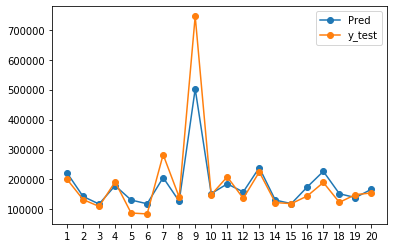

In [783]:
plt.plot(np.arange(1,len(y_pred_50)+1), y_pred_50,label='Pred',
        marker='o')
plt.plot(np.arange(1,len(y_test_50) + 1), y_test_50, 
         label='y_test',marker='o')
plt.xticks(np.arange(1,len(y_pred_50)+1))
plt.legend()



In [715]:
one_stage = Stage(5,model_list1)
one_stage.forward(X_train_standard,y_train_array)
one_stage.predict(X_test)

2個の特徴量で学習を開始します。
サンプル数 1168
index数 934
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 234
サンプル数 1168
index数 934
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 468
サンプル数 1168
index数 934
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 702
サンプル数 1168
index数 935
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 935
サンプル数 1168
index数 935
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 1168
最後の値が格納されているかチェック [319000. 144000. 108500. ... 210000. 201000. 211000.]
サンプル数 1168
index数 934
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 234
サンプル数 1168
index数 934
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 468
サンプル数 1168
index数 934
k_count, d_count
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
last_sample_idx 702
サンプル数 1168
index数 935
k_count, d_count

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 935
サンプル数 1168
index数 935
k_count, d_count
<class 'sklearn.svm.classes.SVR'>
last_sample_idx 1168
最後の値が格納されているかチェック [164181.7486806  163770.5884226  163804.59815441 ... 163193.47843274
 163228.22950367 163266.9974203 ]
使用するモデルの形を表示： (3, 5)
モデルの長さ： 3
2個の特徴量で予測を行います。
test_pred [184750. 184750. 184750.]
2個の特徴量で予測を行います。
test_pred [184750. 184750. 184750.]
2個の特徴量で予測を行います。
test_pred [184750. 184750. 184750.]
2個の特徴量で予測を行います。
test_pred [184750. 184750. 184750.]
2個の特徴量で予測を行います。
test_pred [184750. 184750. 184750.]
test_preds in stage: [[184750. 184750. 184750. 184750. 184750.]
 [184750. 184750. 184750. 184750. 184750.]
 [184750. 184750. 184750. 184750. 184750.]]
test_preds_mean:  [184750. 184750. 184750. 184750. 184750. 184750. 184750. 184750. 184750.
 184750. 184750. 184750. 184750. 184750. 184750. 184750. 184750. 184750.
 184750. 184750. 184750. 184750. 184750. 184750. 184750. 184750. 184750.
 184750. 184750. 184750. 184750. 18

array([[184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        , 163054.20318514],
       [184750.        , 184750.        

In [668]:
print(stacking.learned_model_lists[0])

[[DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
  DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
  DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
  

In [669]:
stacking.learned_model_lists[-1][0][0]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [742]:
choice = np.random.choice(np.arange(12),5)
choice

array([1, 2, 9, 4, 4])

In [786]:
class AdaBoost:
    def __init__(self,est_list, size):
        self.est_list = est_list
        self.size = size
        self.learned_models = []
        
    def fit(self,X,y):
        
        self.first_fit(X,y)
        self.fit_inclue_false_pred(X,y)
        self.not_match_data_fit(X,y)
        pred_array = np.concatnate([pred1,pred2,pred3],axis=0)
        pred = np.mean(pred_array,axis=0)
        
        
        
    def first_fit(self,X,y):
        
        X_train, y_train, X_test,y_test = \
        train_test_split(X,y,test_size=self.size)
        d1_train = X
        d1_test = y    
        
        est = self.est_list[0].fit(d1_train, d1_test)
        self.learned_models.append(est)
        est_pred = est.predict(X_test)
        
        
        
        
        
    def predict(self,X):
        
        
        pred1 = self.first_fit(X,y)
        pred2 = self.fit_inclue_false_pred(X,y)
        pred3 = self.not_match_data_fit(X,y)
        pred_array = np.concatnate([pred1,pred2,pred3],axis=0)
        pred = np.mean(pred_array,axis=0)
        return pred
        
        
    

SyntaxError: invalid syntax (<ipython-input-786-4c500b15c81f>, line 6)

In [ ]:
X